In [13]:
import json
import math
import networkx as nx
import numpy as np
from metrics import *
import tensorflow as tf

print(tf.version.VERSION)

2.11.0


In [14]:
#Autoreloads modules that have changed like metrics.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#Import graph

In [15]:
multigraph = nx.read_graphml('../data/planetoid_split/cora.graphml')
print(type(multigraph))

<class 'networkx.classes.graph.Graph'>


In [16]:
G = multigraph

In [17]:
print(list(G.nodes(data=True))[1])

('1', {'w.0': 0, 'w.1': 0, 'w.2': 0, 'w.3': 0, 'w.4': 0, 'w.5': 0, 'w.6': 0, 'w.7': 0, 'w.8': 0, 'w.9': 0, 'w.10': 0, 'w.11': 0, 'w.12': 0, 'w.13': 0, 'w.14': 0, 'w.15': 0, 'w.16': 0, 'w.17': 0, 'w.18': 0, 'w.19': 1, 'w.20': 0, 'w.21': 0, 'w.22': 0, 'w.23': 0, 'w.24': 0, 'w.25': 0, 'w.26': 0, 'w.27': 0, 'w.28': 0, 'w.29': 0, 'w.30': 0, 'w.31': 0, 'w.32': 0, 'w.33': 0, 'w.34': 0, 'w.35': 0, 'w.36': 0, 'w.37': 0, 'w.38': 0, 'w.39': 0, 'w.40': 0, 'w.41': 0, 'w.42': 0, 'w.43': 0, 'w.44': 0, 'w.45': 0, 'w.46': 0, 'w.47': 0, 'w.48': 0, 'w.49': 0, 'w.50': 0, 'w.51': 0, 'w.52': 0, 'w.53': 0, 'w.54': 0, 'w.55': 0, 'w.56': 0, 'w.57': 0, 'w.58': 0, 'w.59': 0, 'w.60': 0, 'w.61': 0, 'w.62': 0, 'w.63': 0, 'w.64': 0, 'w.65': 0, 'w.66': 0, 'w.67': 0, 'w.68': 0, 'w.69': 0, 'w.70': 0, 'w.71': 0, 'w.72': 0, 'w.73': 0, 'w.74': 0, 'w.75': 0, 'w.76': 0, 'w.77': 0, 'w.78': 0, 'w.79': 0, 'w.80': 0, 'w.81': 0, 'w.82': 0, 'w.83': 0, 'w.84': 0, 'w.85': 0, 'w.86': 0, 'w.87': 0, 'w.88': 1, 'w.89': 0, 'w.90': 0, 'w

In [18]:
wds = 'class_label'

In [19]:
from collections import Counter

node_labels_set = set()
index = 0
node_labels = {}

for _, node_attrs in list(G.nodes(data=True)):
    node_labels_set.add(node_attrs[wds])

for label in node_labels_set:
    node_labels[label] =  index
    index +=1

typesn = []
for node in G.nodes:
  typesn.append(G.nodes[node][wds])
  G.nodes[node][wds]=node_labels[G.nodes[node][wds]]

Counter(typesn)

Counter({'Neural_Networks': 818,
         'Probabilistic_Methods': 426,
         'Theory': 351,
         'Genetic_Algorithms': 418,
         'Reinforcement_Learning': 217,
         'Case_Based': 298,
         'Rule_Learning': 180})

In [20]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
# torch.cuda.is_available()

In [21]:
node_attributes = list(G.nodes['0'].keys())

In [22]:
grafo = dgl.from_networkx(G,node_attrs=node_attributes)

print(grafo.ndata)

{'w.0': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.1': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.2': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.3': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.4': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.5': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.6': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.7': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.8': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.9': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.10': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.11': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.12': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.13': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.14': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.15': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.16': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.17': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.18': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.19': tensor([1, 1, 0,  ..., 0, 0, 0]), 'w.20': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.21': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.22': tensor([0, 0, 0,  ..., 0, 0, 0]), 'w.23': tensor([0, 0, 0,  ..., 0, 0, 0]), '

In [23]:
import dgl
from dgl.data import DGLDataset
import torch
import os

class CoraDatasetM(DGLDataset):
    def __init__(self):
        super().__init__(name='coradataset')

    def process(self):
        graph_copy = dgl.from_networkx(G,node_attrs=node_attributes)
        self.graph = dgl.from_networkx(G)

        self.graph.ndata['feat']= graph_copy.ndata['w.0'].reshape(1, -1).T
        for i in node_attributes:
            if 'w.' in i and i != 'w.0':
                tessorTuple = (self.graph.ndata['feat'],graph_copy.ndata[i].reshape(1, -1).T)
                self.graph.ndata['feat']= torch.cat(tessorTuple,1)
        self.graph.ndata['label'] = graph_copy.ndata[wds]

        # If your dataset is a node classification dataset, you will need to assign
        # masks indicating whether a node belongs to training, validation, and test set.
        # n_nodes = self.graph.ndata['label'].shape[0]
        # n_train = int(n_nodes * 0.6)
        # n_val = int(n_nodes * 0.2)
        # train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        # val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        # test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        # train_mask[:n_train] = True
        # val_mask[n_train:n_train + n_val] = True
        # test_mask[n_train + n_val:] = True

        self.graph.ndata['train_mask'] = graph_copy.ndata['train_mask.0']
        self.graph.ndata['val_mask'] = graph_copy.ndata['validation_mask.0']
        self.graph.ndata['test_mask'] = graph_copy.ndata['test_mask.0']

    def num_classes(self):
        return len(Counter(self.graph.ndata['label'].numpy()))

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = CoraDatasetM()
g = dataset[0]
g = dgl.add_self_loop(g)
# g = g.to('cuda')

print(g)

Graph(num_nodes=2708, num_edges=13264,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})


In [24]:
print(g)
print(g.ndata)
print(g.edata)
print(g.ndata['feat'].shape)
print(dataset.num_classes())

Graph(num_nodes=2708, num_edges=13264,
      ndata_schemes={'feat': Scheme(shape=(1433,), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})
{'feat': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'label': tensor([2, 1, 4,  ..., 2, 6, 6]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ..., False, False, False])}
{}
torch.Size([2708, 1433])
7


In [25]:
from dgl.nn.pytorch import GraphConv
from models.gat.pygat import GAT
from models.gcn.pygcn import GCN
from models.graphsage.pygraphsage import SAGE
import tensorflow as tf
from torchsummary import summary

# pytorch gcn model
# model = GCN(g.ndata['feat'].shape[1], 16, dataset.num_classes())

# # pytorch gat model
# model = GAT(g.ndata['feat'].shape[1], 8, dataset.num_classes(), heads=[8, 1])

# pytorch sage model
model = SAGE(g.ndata['feat'].shape[1], 256, dataset.num_classes())

# tensorflow/keras GCN model not working :(

# in_feats = g.ndata['feat'].shape[1]
# n_hidden = 16
# n_classes = dataset.num_classes()
# n_layers = 0
# dropout = hp.dropout
# model = GCN(
#     g,
#     in_feats,
#     n_hidden,
#     n_classes,
#     n_layers,
#     tf.nn.relu,
#     dropout,
# )
# summary(model, input_size=(1, 1433))

In [26]:
def evaluate(g, features, labels, mask, model):
    model.eval()
    with torch.no_grad():
        logits = model(g, features.float())
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

def train(g, features, labels, masks, model):
    # define train/val samples, loss function and optimizer
    train_mask = masks[0]
    val_mask = masks[1]
    loss_fcn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=5e-4)
    best_val_loss = math.inf
    patience = model.metrics.patience

    # training loop
    for epoch in range(200):
        model.train()
        logits = model(g, features.float())
        loss = loss_fcn(logits[train_mask], labels[train_mask])
        val_loss = loss_fcn(logits[val_mask], labels[val_mask])
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience = model.metrics.patience
        else:
            patience -= 1

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = evaluate(g, features, labels, val_mask, model)
        print(
            "Epoch {:05d} | Loss {:.4f} | Accuracy {:.4f} ".format(
                epoch, loss.item(), acc
            )
        )

        # if patience == 0:
        #     break

features = g.ndata['feat']
labels = g.ndata['label']
masks = g.ndata['train_mask'], g.ndata['val_mask'], g.ndata['test_mask']

train(g, features, labels, masks, model)

Epoch 00000 | Loss 2.2976 | Accuracy 0.1140 
Epoch 00001 | Loss 3.1004 | Accuracy 0.3800 
Epoch 00002 | Loss 1.5444 | Accuracy 0.4780 
Epoch 00003 | Loss 0.7591 | Accuracy 0.6920 
Epoch 00004 | Loss 0.4455 | Accuracy 0.7020 
Epoch 00005 | Loss 0.3163 | Accuracy 0.7200 
Epoch 00006 | Loss 0.1674 | Accuracy 0.7600 
Epoch 00007 | Loss 0.0691 | Accuracy 0.7720 
Epoch 00008 | Loss 0.0374 | Accuracy 0.7760 
Epoch 00009 | Loss 0.0175 | Accuracy 0.7420 
Epoch 00010 | Loss 0.0093 | Accuracy 0.7200 
Epoch 00011 | Loss 0.0154 | Accuracy 0.7060 
Epoch 00012 | Loss 0.0075 | Accuracy 0.7040 
Epoch 00013 | Loss 0.0045 | Accuracy 0.7000 
Epoch 00014 | Loss 0.0308 | Accuracy 0.7060 
Epoch 00015 | Loss 0.0200 | Accuracy 0.7180 
Epoch 00016 | Loss 0.0020 | Accuracy 0.7240 
Epoch 00017 | Loss 0.0006 | Accuracy 0.7280 
Epoch 00018 | Loss 0.0004 | Accuracy 0.7300 
Epoch 00019 | Loss 0.0064 | Accuracy 0.7280 
Epoch 00020 | Loss 0.0009 | Accuracy 0.7400 
Epoch 00021 | Loss 0.0006 | Accuracy 0.7380 
Epoch 0002

In [27]:
features = g.ndata['feat']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
val_mask = g.ndata['val_mask']
test_mask = g.ndata['test_mask']

import time

start = time.time()

logits = model(g, features.float())
# the training phase left the gradient in the tensor with gat, so we need to convert it to a tensor with gradient set to None, otherwise
# trying to print the confusion matrix is gonna get errors
logits = torch.tensor(logits)

end = time.time()
print(end - start)

train_x = features[train_mask]
val_x = features[val_mask]
test_x = features[test_mask]

train_logits = logits[train_mask]
val_logits = logits[val_mask]
test_logits = logits[test_mask]
train_labels = labels[train_mask]
val_labels = labels[val_mask]
test_labels = labels[test_mask]

print(logits.shape)
print(train_logits.shape)
print(val_logits.shape)
print(test_logits.shape)

0.09569120407104492
torch.Size([2708, 7])
torch.Size([140, 7])
torch.Size([500, 7])
torch.Size([1000, 7])


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_14116\2962514485.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logits = torch.tensor(logits)


In [28]:
print(logits, logits.grad_fn, type(logits))


one_hot_y_train = F.one_hot(train_labels)
one_hot_y_val = F.one_hot(val_labels)
one_hot_y_test = F.one_hot(test_labels)


tensor([[-1.5045, -1.1186,  8.6476,  ..., -3.5405, -1.0891, -1.9299],
        [-4.1337, 14.2048, -2.0331,  ...,  0.6675, -3.3583, -2.0931],
        [-0.1309, -3.0692, -4.7063,  ...,  9.8121, -0.8311, -2.4154],
        ...,
        [-0.8617, -0.7588,  5.0007,  ..., -2.5387, -0.7783, -0.7623],
        [-2.3791, -1.4388, -1.4803,  ..., -1.6383, -2.0407,  8.5698],
        [-3.0983, -1.7056, -1.8649,  ..., -2.7903, -3.3539, 12.7401]]) None <class 'torch.Tensor'>



Test metrics:
Accuracy: 1.0000
Precision macro: 1.0000
Recall macro: 1.0000
F1 Score macro: 1.0000
AUC-ROC macro,ovr: 1.0000


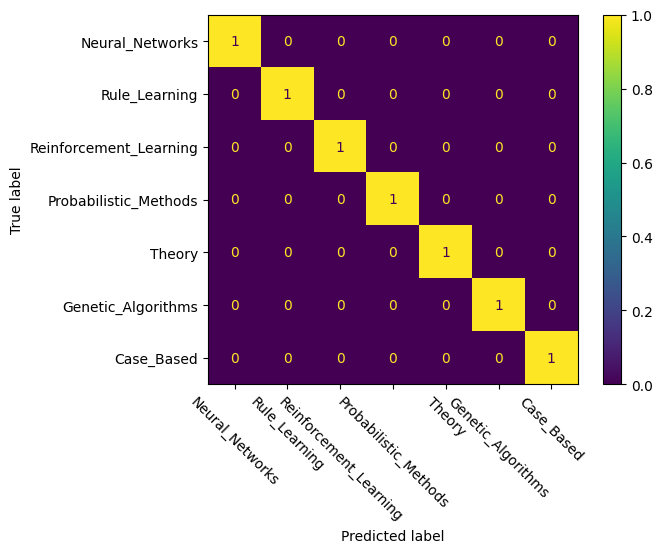

Saving metrics to metrics\cora\dgl_GCN_example1_2023-01-04_19-34-37.json

Test metrics:
Accuracy: 0.7520
Precision macro: 0.7258
Recall macro: 0.7702
F1 Score macro: 0.7388
AUC-ROC macro,ovr: 0.9653


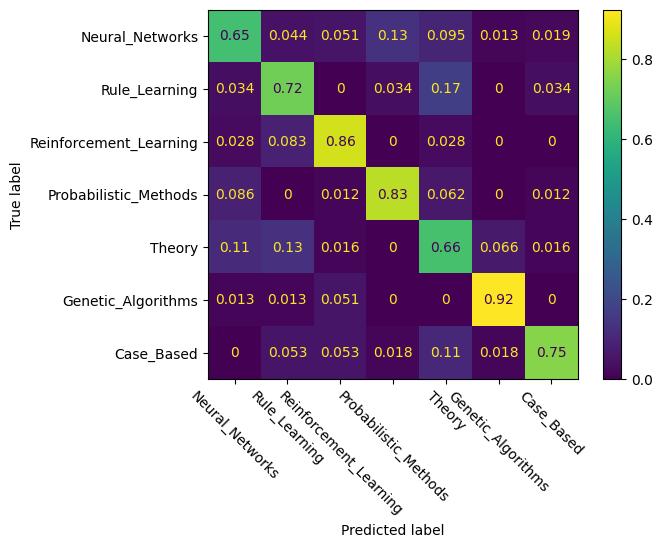

Saving metrics to metrics\cora\dgl_GCN_example1_2023-01-04_19-34-37.json

Test metrics:
Accuracy: 0.8020
Precision macro: 0.7864
Recall macro: 0.8160
F1 Score macro: 0.7962
AUC-ROC macro,ovr: 0.9653


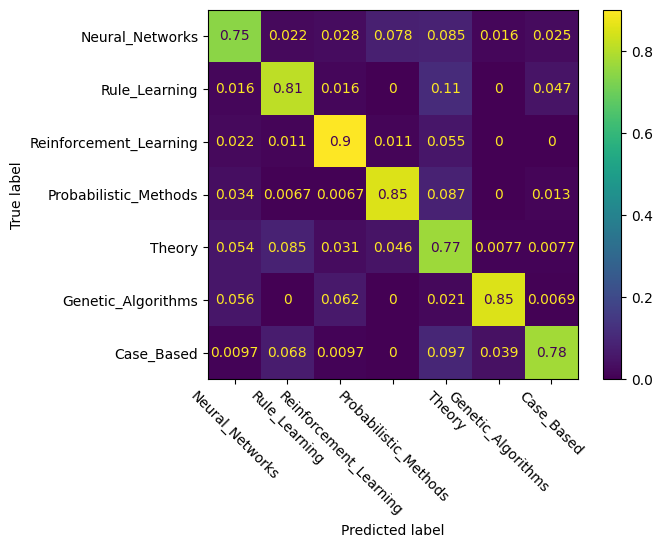

Saving metrics to metrics\cora\dgl_GCN_example1_2023-01-04_19-34-37.json


In [19]:
from metrics import Datasets, Frameworks

display_and_save(framework=Frameworks.DGL,
                 dataset_name=Datasets.CORA,
                 model_name='GCN_example1',
                 predictions=train_logits,#Output of the model
                 y=one_hot_y_train,#True labels, one hot encoded
                 class_names=node_labels,
                 exec_ms=1050)

display_and_save(framework=Frameworks.DGL,
                 dataset_name=Datasets.CORA,
                 model_name='GCN_example1',
                 predictions=val_logits,#Output of the model
                 y=one_hot_y_val,#True labels, one hot encoded
                 class_names=node_labels,
                 exec_ms=1050)

display_and_save(framework=Frameworks.DGL,
                 dataset_name=Datasets.CORA,
                 model_name='GCN_example1',
                 predictions=test_logits,#Output of the model
                 y=one_hot_y_test,#True labels, one hot encoded
                 class_names=node_labels,
                 exec_ms=1050)